In [8]:
import pandas as pd

In [10]:
data = pd.read_csv("../data/train_with_lyrics.csv")
data.head()

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,Lyrics
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo,Gently hold our hands\r\nGently hold our heads...
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa,We are the Sun\r\nWe are the dead stars\r\nWe ...
2,239138,SOACXLC12AB018218D,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business,NaN
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch,You're out of touch\r\nI'm out of time\r\nBut ...
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander,You finally close the door\r\nYou've left open...


In [11]:
data = data.dropna()
data.head()

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,Lyrics
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo,Gently hold our hands\r\nGently hold our heads...
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa,We are the Sun\r\nWe are the dead stars\r\nWe ...
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch,You're out of touch\r\nI'm out of time\r\nBut ...
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander,You finally close the door\r\nYou've left open...
5,283306,SOCSRIF12AB018E4FC,TRABHPA12903CEC222,0.373325,-0.923151,Duke Ellington,Caravan,随分先に行ってしまった 光の下のキャラバン\r\nトンネルに残響 塞いだ耳 自分嫌いな自分が...


In [12]:
ids = data["dzr_sng_id"][:20]
artists = data["artist_name"][:20]
tracks = data["track_name"][:20] 

# PLAN!!! 
I want to use Deezer Song IDs as the Spectrogram Image ID
These will help when I'll be creating a custom dataset.

In [1]:
from youtube_search import YoutubeSearch
import youtube_dl

In [2]:
res = YoutubeSearch("Bad Liar Imagine Dragons", max_results=1).to_dict()
link = "https://www.youtube.com" + res[0]["url_suffix"]

In [3]:
link

'https://www.youtube.com/watch?v=I-QfPUz1es8'

In [4]:
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'postprocessor_args': [
        '-ac', '1' # mono channel
    ],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([link])

[youtube] I-QfPUz1es8: Downloading webpage
[youtube] I-QfPUz1es8: Downloading player 223a7479
[download] Destination: Imagine Dragons - Bad Liar-I-QfPUz1es8.webm
[download] 100% of 4.70MiB in 00:01                  
[ffmpeg] Destination: Imagine Dragons - Bad Liar-I-QfPUz1es8.mp3
Deleting original file Imagine Dragons - Bad Liar-I-QfPUz1es8.webm (pass -k to keep)


In [14]:
name = "Bad Lair Imagine Dragons"

In [6]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp

C:\Users\marti\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


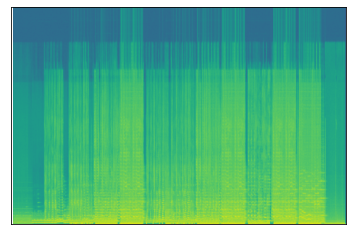

In [20]:
mp3_audio = AudioSegment.from_file('Imagine Dragons - Bad Liar-I-QfPUz1es8.mp3', format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, data = wavfile.read(wname)  # read wav file
plt.specgram(data, Fs=FS, NFFT=1024, noverlap=0)  # plot
plt.xticks([])
plt.yticks([])
plt.savefig(f"music/{name}", dpi=300)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html
    
https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html#spectrogram

In [24]:
import shutil
import os

In [46]:
souce = os.listdir()
for file in souce:
    if file.endswith(".mp3"):
        print(file)

Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.mp3
Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.mp3


In [44]:
souce

['.ipynb_checkpoints',
 'Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.m4a',
 'Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.mp3',
 'audio_service.py',
 "Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.mp3",
 'hdf5_getters.py',
 'music',
 'Spectogram Service.ipynb',
 'spectrograms',
 'test_files',
 '__init__.py',
 '__pycache__']

In [41]:
string = "wewr-ewr.mp3"

In [42]:
string.endswith(".mp3")

True

In [47]:
def create_spectrogram(ids, artist_name, track_name):
    name = track_name + " by " + artist_name
    res = YoutubeSearch(name, max_results=1).to_dict()
    link = "https://www.youtube.com" + res[0]["url_suffix"]

    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
        'postprocessor_args': [
            '-ac', '1' # mono channel
        ],
    }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([link])
        
    
    souce = os.listdir()
    for file in souce:
        if file.endswith(".mp3"):
            print(file)
            mp3_audio = AudioSegment.from_file(file, format="mp3")  # read mp3
            wname = mktemp('.wav')  # use temporary file
            mp3_audio.export(wname, format="wav")  # convert to wav
            FS, data = wavfile.read(wname)  # read wav file
            plt.specgram(data, Fs=FS, NFFT=1024, noverlap=0)  # plot
            plt.xticks([])
            plt.yticks([])
            plt.savefig(f"spectrograms/{ids}", dpi=300)
            plt.close()
            shutil.move(file, "music/")
            break

In [48]:
for i in range(len(ids)):
    create_spectrogram(ids[i], artists[i], tracks[i])

[youtube] P16Wpyqu06s: Downloading webpage
[download] Destination: Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.webm
[download] 100% of 6.50MiB in 00:01                          
[ffmpeg] Destination: Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.mp3
Deleting original file Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.webm (pass -k to keep)
Dark tranquility - Insanity's Crescendo-P16Wpyqu06s.mp3


C:\Users\marti\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


[youtube] MCbK3lWb1Eg: Downloading webpage
[download] Destination: Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.m4a
[download] 100% of 6.75MiB in 01:57                  
[ffmpeg] Destination: Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.mp3
Deleting original file Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.m4a (pass -k to keep)
Anorexia Nervosa - Stabat Mater Dolorosa-MCbK3lWb1Eg.mp3


KeyError: 2